## Ahmad Soni - 668564

## Nasiem Ayob - 1825850

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
import numpy as np

In [2]:

warnings.filterwarnings("ignore")

## Attribute Information:

### Classes
19 Classes:
- diaporthe-stem-canker, 
- charcoal-rot, 
- rhizoctonia-root-rot,
- phytophthora-rot, 
- brown-stem-rot, 
- powdery-mildew,
- downy-mildew, 
- brown-spot, 
- bacterial-blight,
- bacterial-pustule, 
- purple-seed-stain, 
- anthracnose,
- phyllosticta-leaf-spot, 
- alternarialeaf-spot,
- frog-eye-leaf-spot, 
- diaporthe-pod-&-stem-blight,
- cyst-nematode, 
- 2-4-d-injury, 
- herbicide-injury.

### Features
1. date: april,may,june,july,august,september,october,?.
2. plant-stand: normal,lt-normal,?.
3. precip: lt-norm,norm,gt-norm,?.
4. temp: lt-norm,norm,gt-norm,?.
5. hail: yes,no,?.
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?.
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?.
8. severity: minor,pot-severe,severe,?.
9. seed-tmt: none,fungicide,other,?.
10. germination: 90-100%,80-89%,lt-80%,?.
11. plant-growth: norm,abnorm,?.
12. leaves: norm,abnorm.
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?.
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?.
15. leafspot-size: lt-1/8,gt-1/8,dna,?.
16. leaf-shread: absent,present,?.
17. leaf-malf: absent,present,?.
18. leaf-mild: absent,upper-surf,lower-surf,?.
19. stem: norm,abnorm,?.
20. lodging: yes,no,?.
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?.
22. canker-lesion: dna,brown,dk-brown-blk,tan,?.
23. fruiting-bodies: absent,present,?.
24. external decay: absent,firm-and-dry,watery,?.
25. mycelium: absent,present,?.
26. int-discolor: none,brown,black,?.
27. sclerotia: absent,present,?.
28. fruit-pods: norm,diseased,few-present,dna,?.
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?.
30. seed: norm,abnorm,?.
31. mold-growth: absent,present,?.
32. seed-discolor: absent,present,?.
33. seed-size: norm,lt-norm,?.
34. shriveling: absent,present,?.
35. roots: norm,rotted,galls-cysts,?.

In [3]:
columns = ['class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', \
           'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', \
          'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', \
           'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',\
          'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia',\
          'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size',\
          'shriveling', 'roots']
dfd = pd.read_csv('soybean-large.data', names=columns)
dfn = pd.read_csv('soybean-large.data', names=columns)

In [4]:
dfn.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


Notice how the values are all integers or "?".  The integers relate to the values gives in the attribute descriptions.
So, for example, date value of 0 corresponds to April, roots value of 1 corresponds to "rotted".

If you find it useful, you can create a mapping from the integer to the string.

In [5]:
def create_dict(vals):
    tmp_dict = {k: v for k, v in enumerate(vals.strip().split(',')) if v != '?'}
    tmp_dict['?'] = None
    return tmp_dict

maps = {
    'date': create_dict('april,may,june,july,august,september,october,?'),
    'plant-stand': create_dict('normal,lt-normal,?'),
    'precip': create_dict('lt-norm,norm,gt-norm,?'),
    'temp': create_dict('lt-norm,norm,gt-norm,?'),
    'hail': create_dict('yes,no,?'),
    'crop-hist': create_dict('diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?'),
    'area-damaged': create_dict('scattered,low-areas,upper-areas,whole-field,?'),
    'severity': create_dict('minor,pot-severe,severe,?'),
    'seed-tmt': create_dict('none,fungicide,other,?'),
    'germination': create_dict('90-100%,80-89%,lt-80%,?'),
    'plant-growth': create_dict('norm,abnorm,?'),
    'leaves': create_dict('norm,abnorm'),
    'leafspots-halo': create_dict('absent,yellow-halos,no-yellow-halos,?'),
    'leafspots-marg': create_dict('w-s-marg,no-w-s-marg,dna,?'),
    'leafspot-size': create_dict('lt-1/8,gt-1/8,dna,?'),
    'leaf-shread': create_dict('absent,present,?'),
    'leaf-malf': create_dict('absent,present,?'),
    'leaf-mild': create_dict('absent,upper-surf,lower-surf,?'),
    'stem': create_dict('norm,abnorm,?'),
    'lodging': create_dict('yes,no,?'),
    'stem-cankers': create_dict('absent,below-soil,above-soil,above-sec-nde,?'),
    'canker-lesion': create_dict('dna,brown,dk-brown-blk,tan,?'),
    'fruiting-bodies': create_dict('absent,present,?'),
    'external decay': create_dict('absent,firm-and-dry,watery,?'),
    'mycelium': create_dict('absent,present,?'),
    'int-discolor': create_dict('none,brown,black,?'),
    'sclerotia': create_dict('absent,present,?'),
    'fruit-pods': create_dict('norm,diseased,few-present,dna,?'),
    'fruit spots': create_dict('absent,colored,brown-w/blk-specks,distort,dna,?'),
    'seed': create_dict('norm,abnorm,?'),
    'mold-growth': create_dict('absent,present,?'),
    'seed-discolor': create_dict('absent,present,?'),
    'seed-size': create_dict('norm,lt-norm,?'),
    'shriveling': create_dict('absent,present,?'),
    'roots': create_dict('norm,rotted,galls-cysts,?')
}
        

In [6]:
def get_map_val(key, val):
    if val == '?':
        search_val = '?'
    else:
        search_val = int(val)
        
    return maps.get(key).get(search_val)

for c in maps.keys():
    dfd[c] = dfd[c].apply(lambda x: get_map_val(c, x))

In [7]:
dfd

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
303,herbicide-injury,may,lt-normal,None,lt-norm,None,same-lst-yr,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
304,herbicide-injury,april,lt-normal,None,lt-norm,None,diff-lst-year,whole-field,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
305,herbicide-injury,may,lt-normal,None,lt-norm,None,diff-lst-year,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted


<Figure size 4320x4320 with 0 Axes>

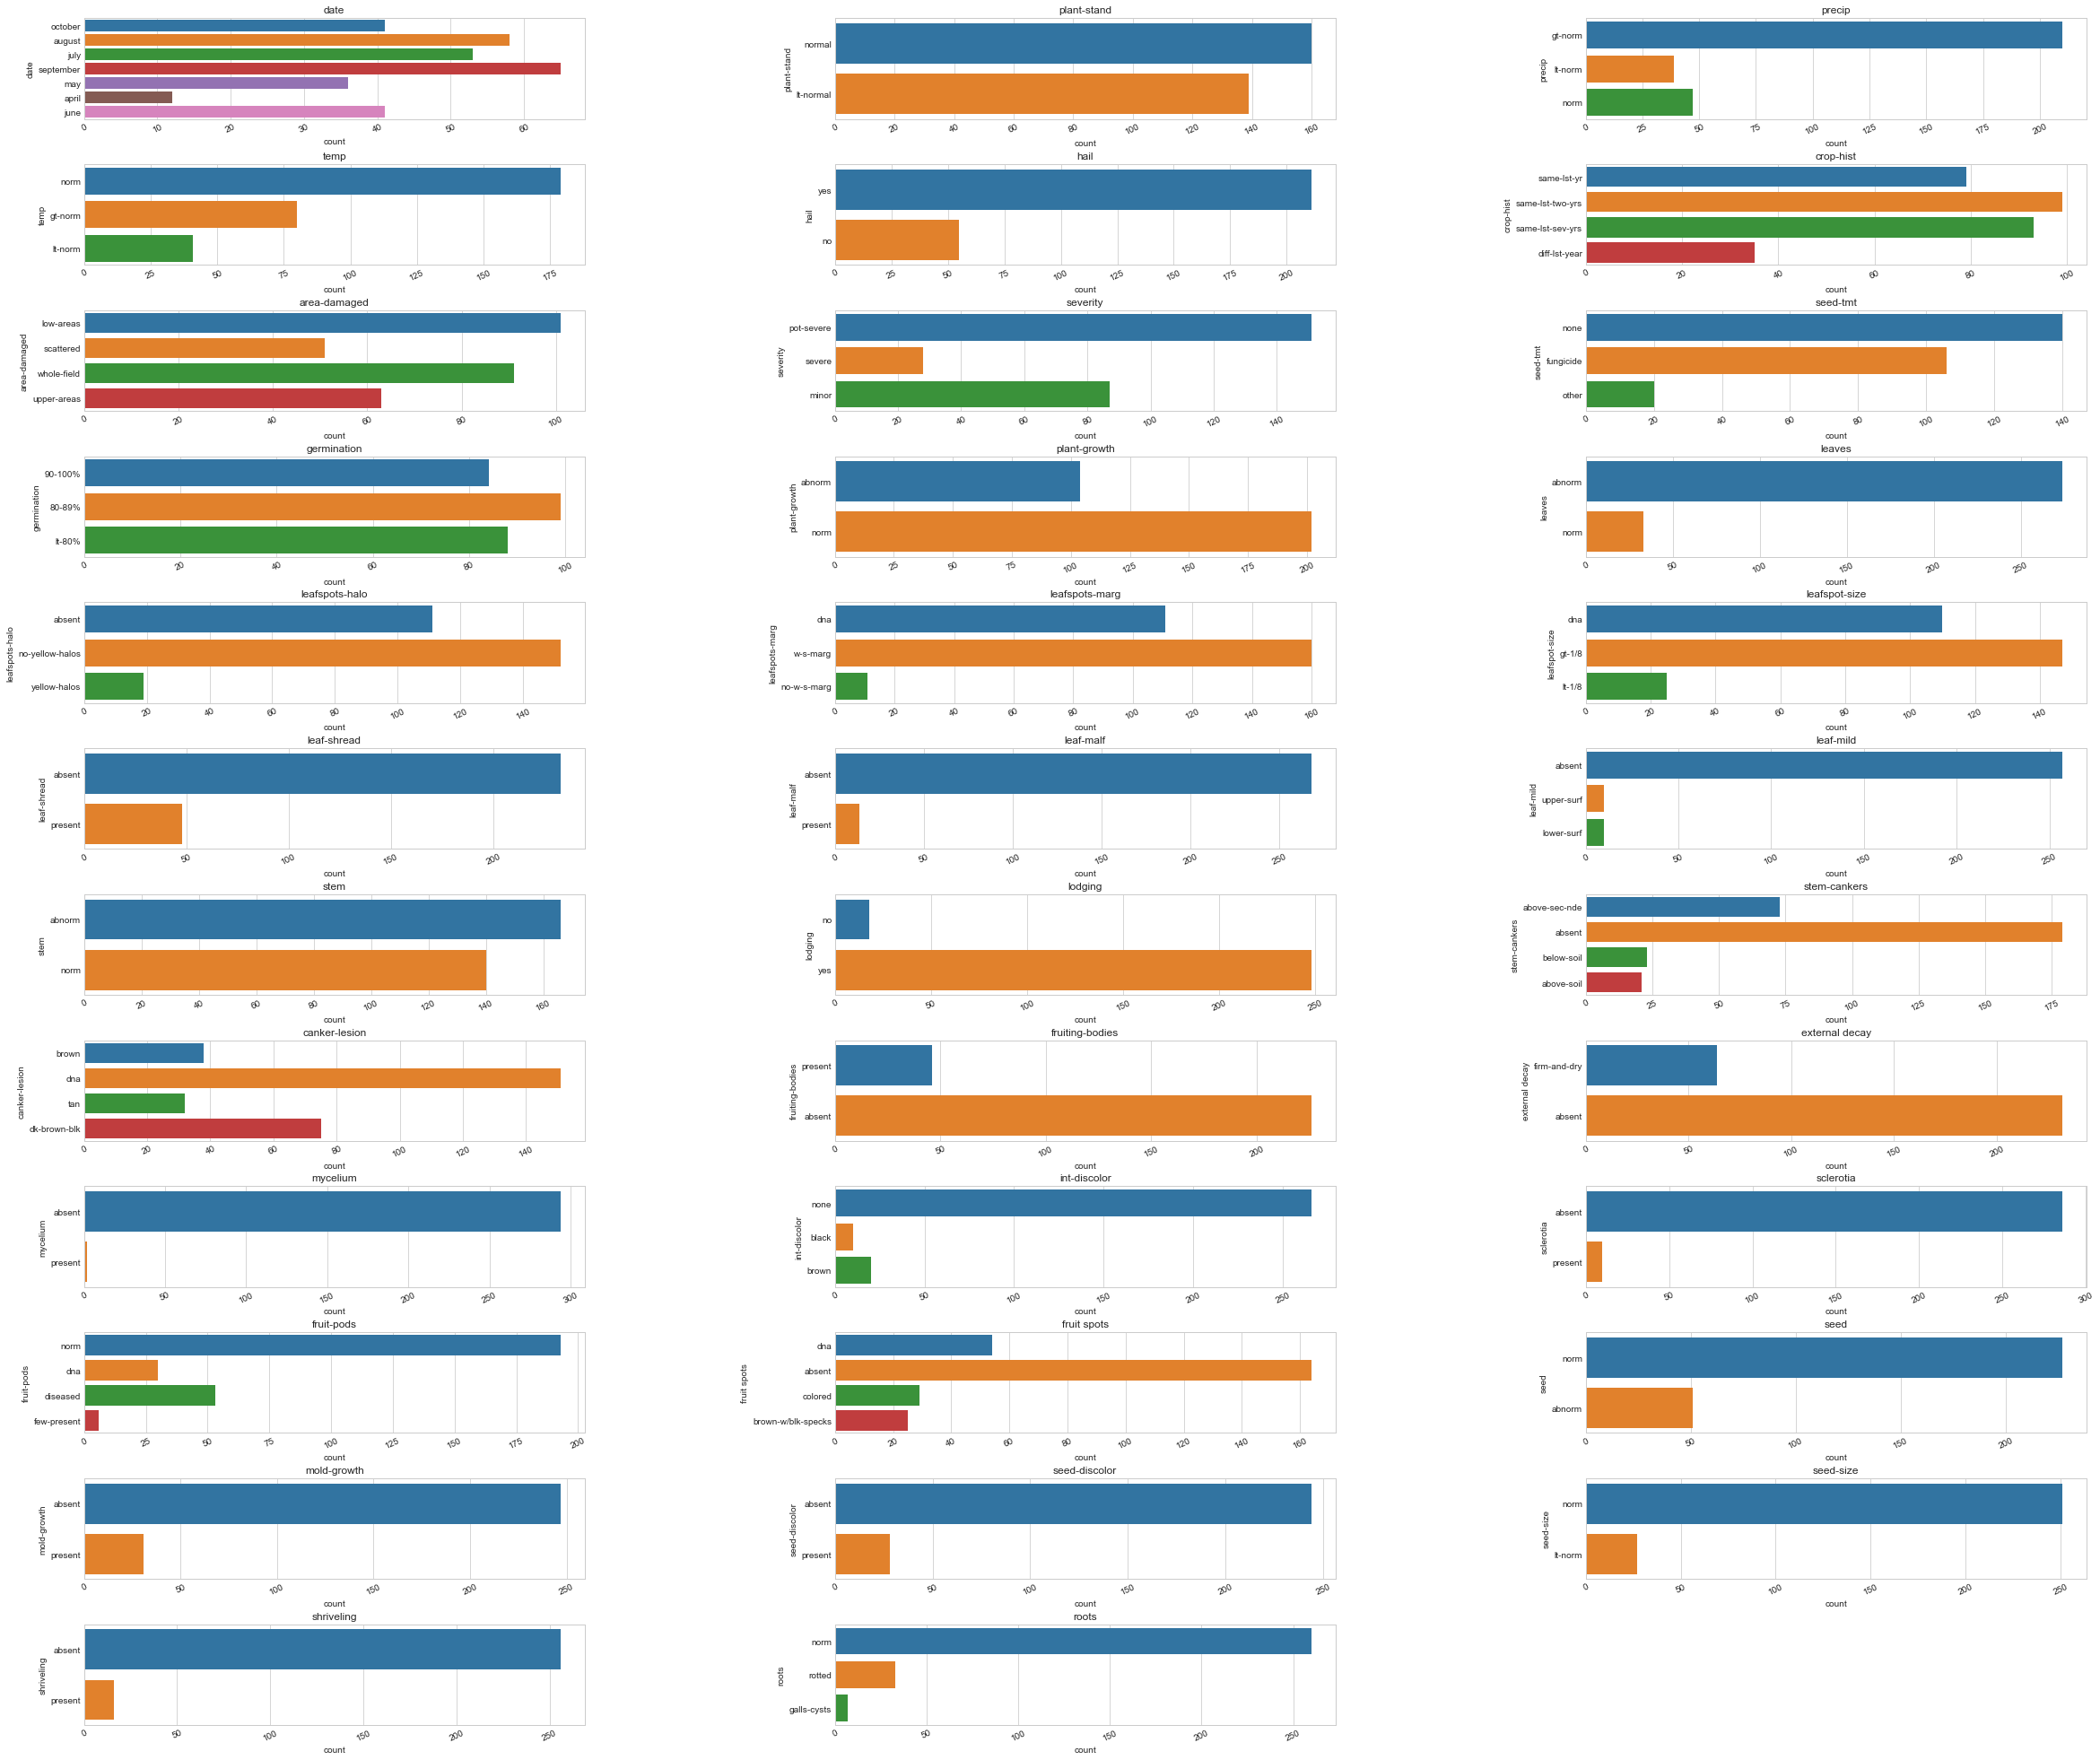

In [8]:
def plot_distribution(dataset, cols=5, width=40, height=35, hspace=0.6, wspace=0.8):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    

plt.figure(figsize=(60, 60))
cols_to_plot = [ 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', \
           'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', \
          'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', \
           'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',\
          'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia',\
          'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size',\
          'shriveling', 'roots']
plot_distribution(dfd[cols_to_plot], cols=3, width=40, height=35, hspace=0.45, wspace=0.5)

From these distributions we can see that the mycelium distribution is redundant as it's absent in all of the plants here, so that data is not meaningful to us at all.

Here we generate a basic plot just to see how many of each class we have

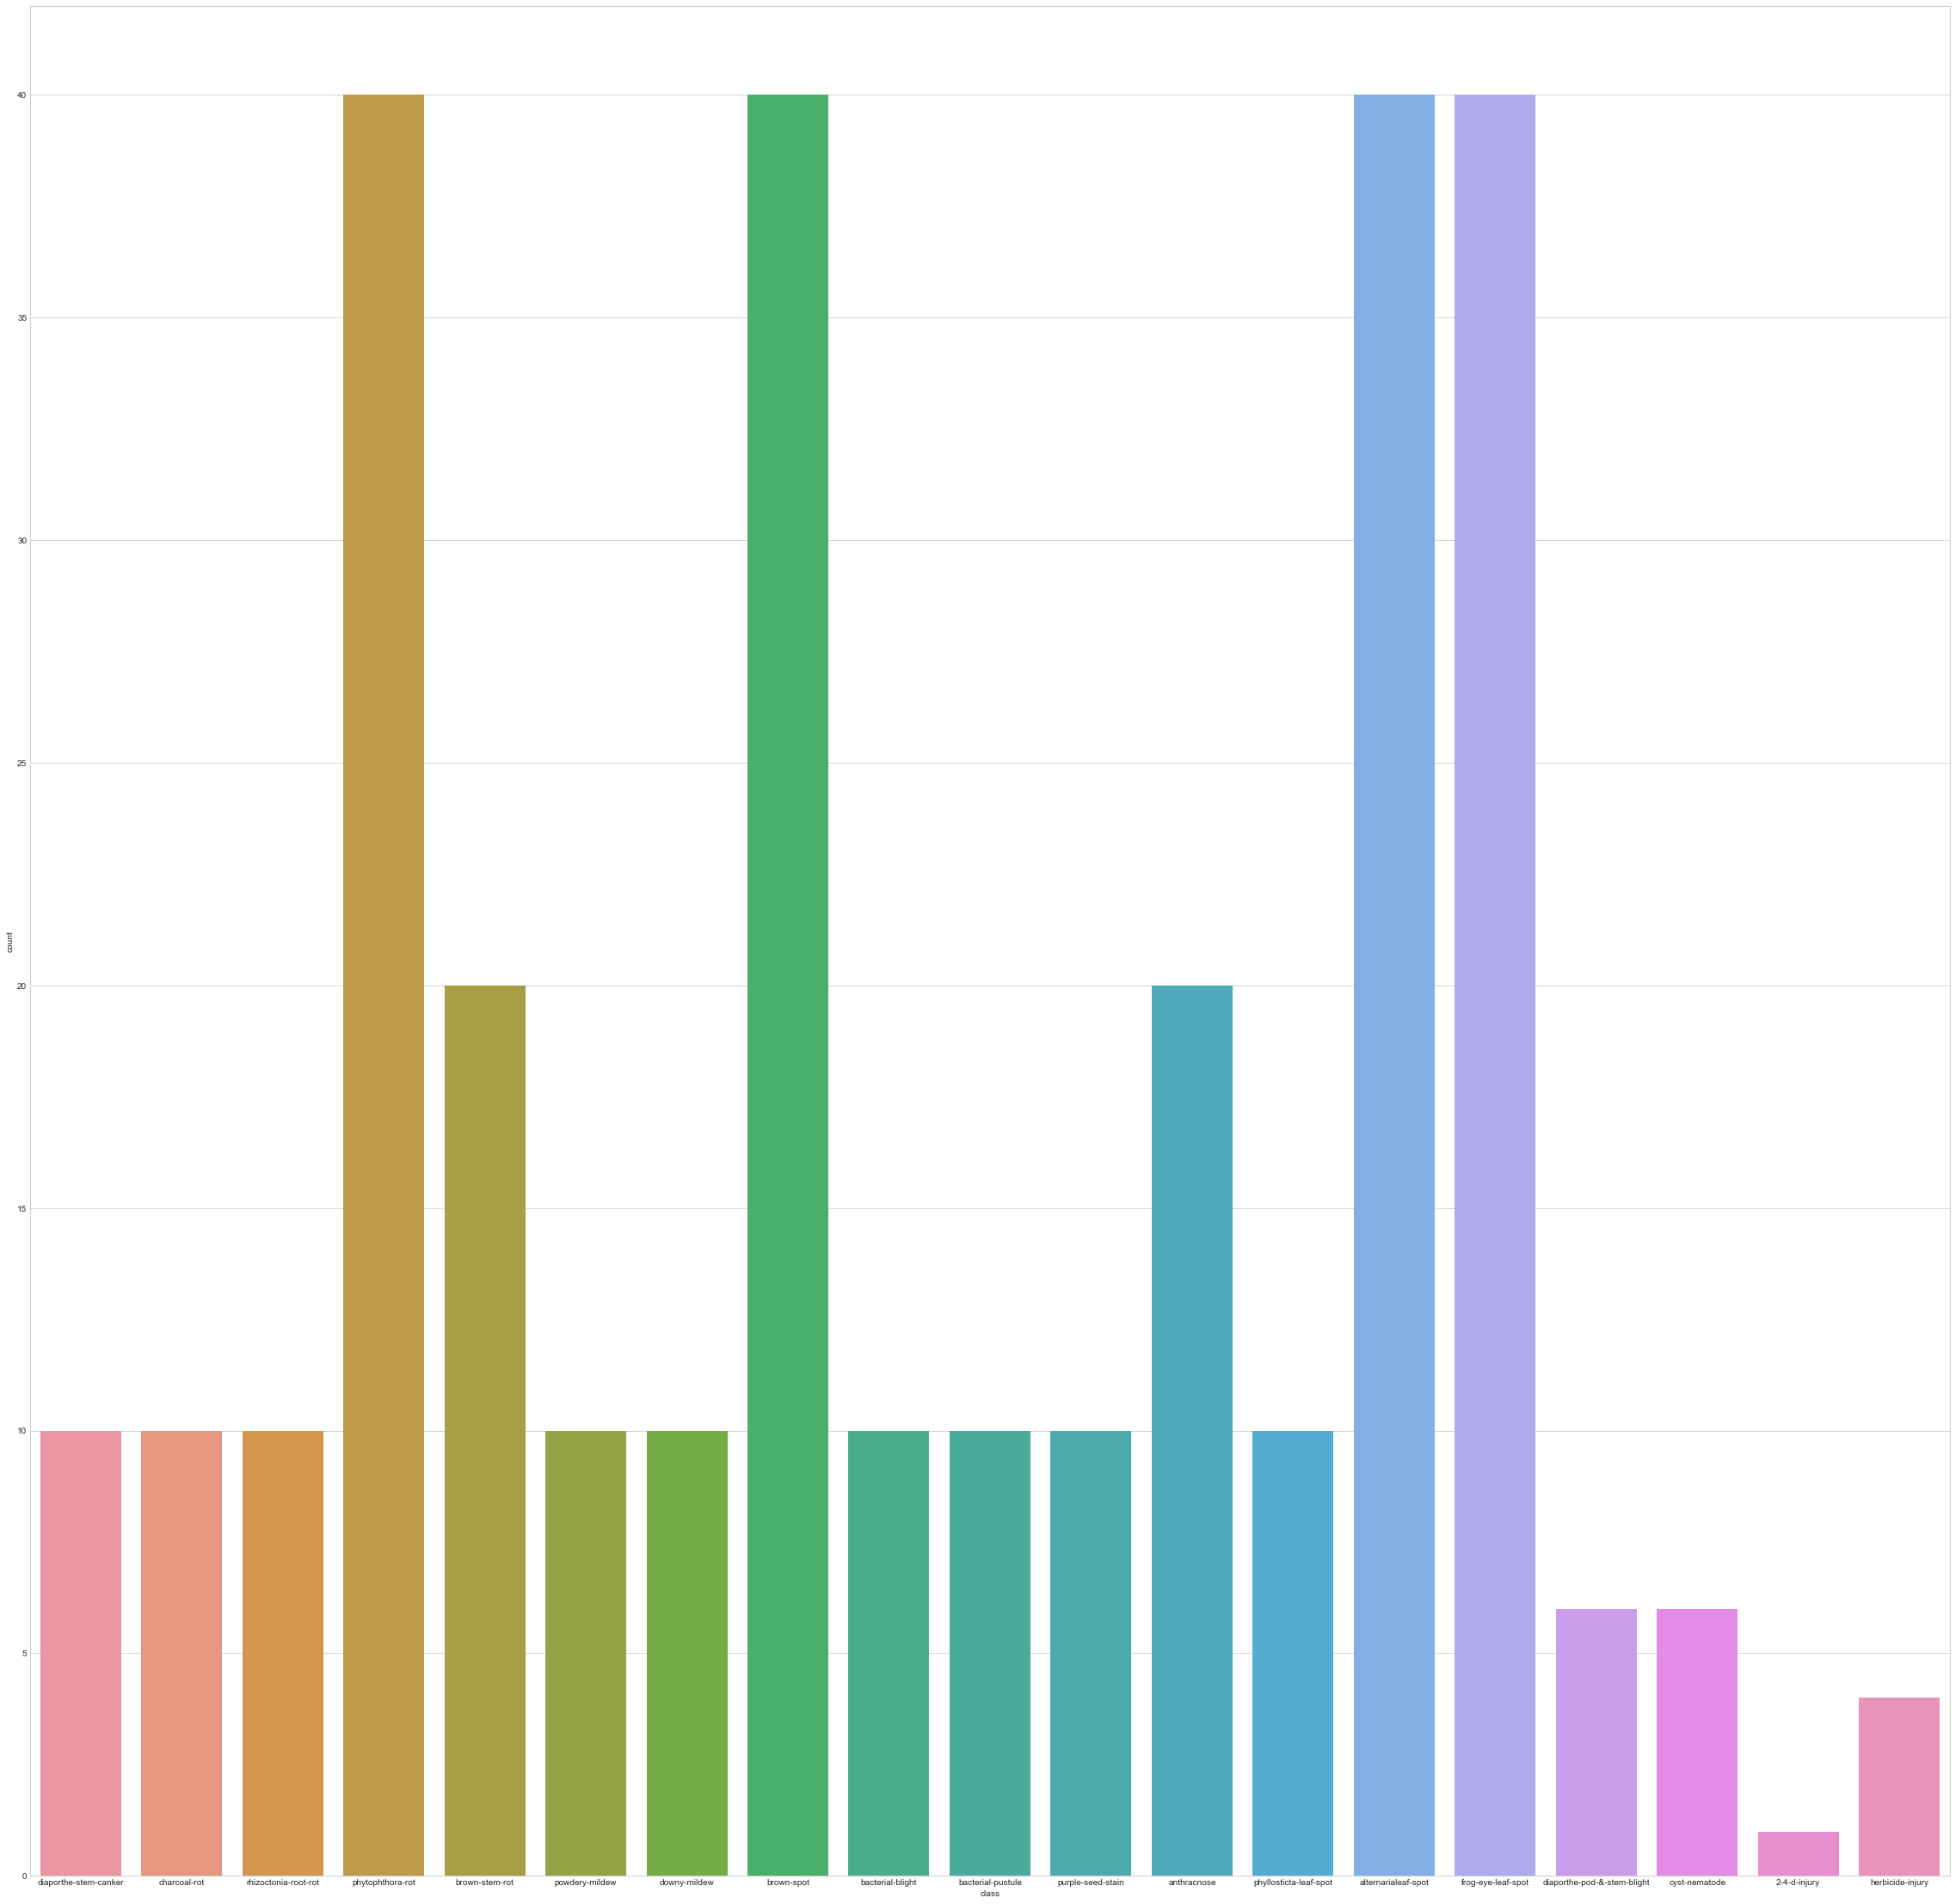

In [9]:
plt.figure(figsize=(40, 40))
ax = sns.countplot(x="class",data=dfd)

Next we will investigate null values in our dataset, first we will check if there are any and if so how many. After we establish that we will find which classes have the most null values


<AxesSubplot:>

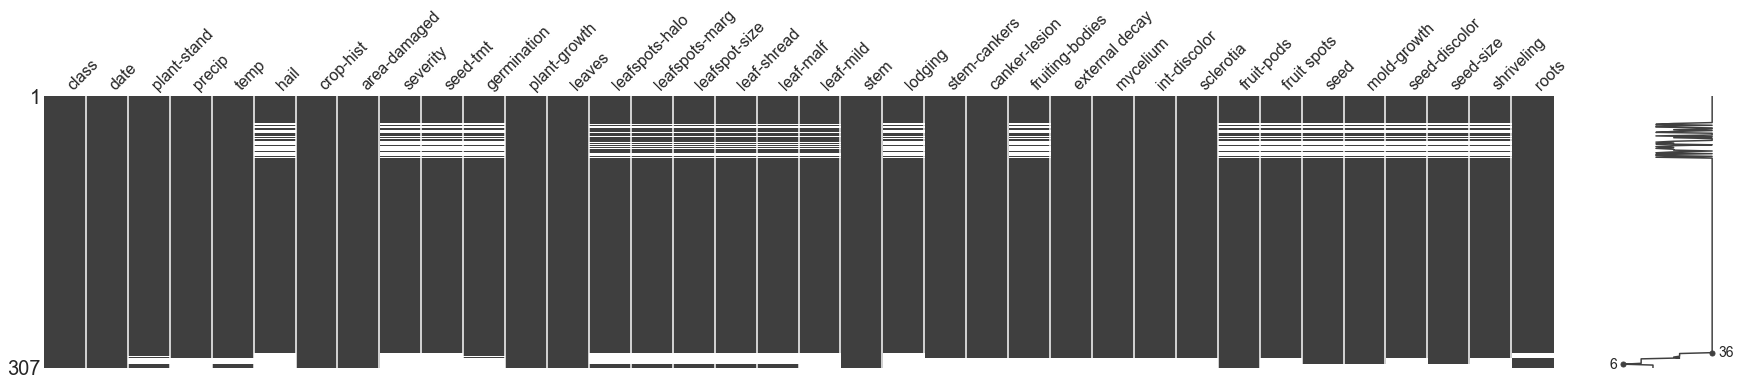

In [13]:
missingno.matrix(dfd, figsize = (30,5))

In [10]:
dfd.isna().sum()

class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [12]:
dg = dfd.isnull().groupby(dfd['class']).sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(dg)
#print(dg)

                             class  date  plant-stand  precip  temp  hail  \
class                                                                       
2-4-d-injury                     0     1            1       1     1     1   
alternarialeaf-spot              0     0            0       0     0     0   
anthracnose                      0     0            0       0     0     0   
bacterial-blight                 0     0            0       0     0     0   
bacterial-pustule                0     0            0       0     0     0   
brown-spot                       0     0            0       0     0     0   
brown-stem-rot                   0     0            0       0     0     0   
charcoal-rot                     0     0            0       0     0     0   
cyst-nematode                    0     0            6       6     6     6   
diaporthe-pod-&-stem-blight      0     0            1       0     0     6   
diaporthe-stem-canker            0     0            0       0     0     0   

From the analysis of missing values per class, we can see that pythophthora-rot has missing values in almost all columns making it the most likely class to be missing features. In terms of features themselves, Hail, Severity, seed-tmp and lodging have the highest amount of missing values. That being said, 24 of each of these missing features out of 41 belong to pythophthora-rot. We might want to consider dropping that class entirely as it's skewing our missing data. From this analysis it also seems like there is a single row with all features missing in 2-4-d-injury, which should be safe to remove. As for the others we will have to find a strategy to deal with the null values.

A strategy we could implement is using forward imputation to essentially "pad" our data. What this does is where it finds a null values it will take the previous entry and duplicate it over to the empty value. This isn't always an ideal solution as if the previous value is an outlier, for example, it would duplicate the outlying value

In [28]:

dffill = dfd.fillna(method="pad")


In [20]:
dffill.isna().sum()

class              0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [21]:
dffill.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm


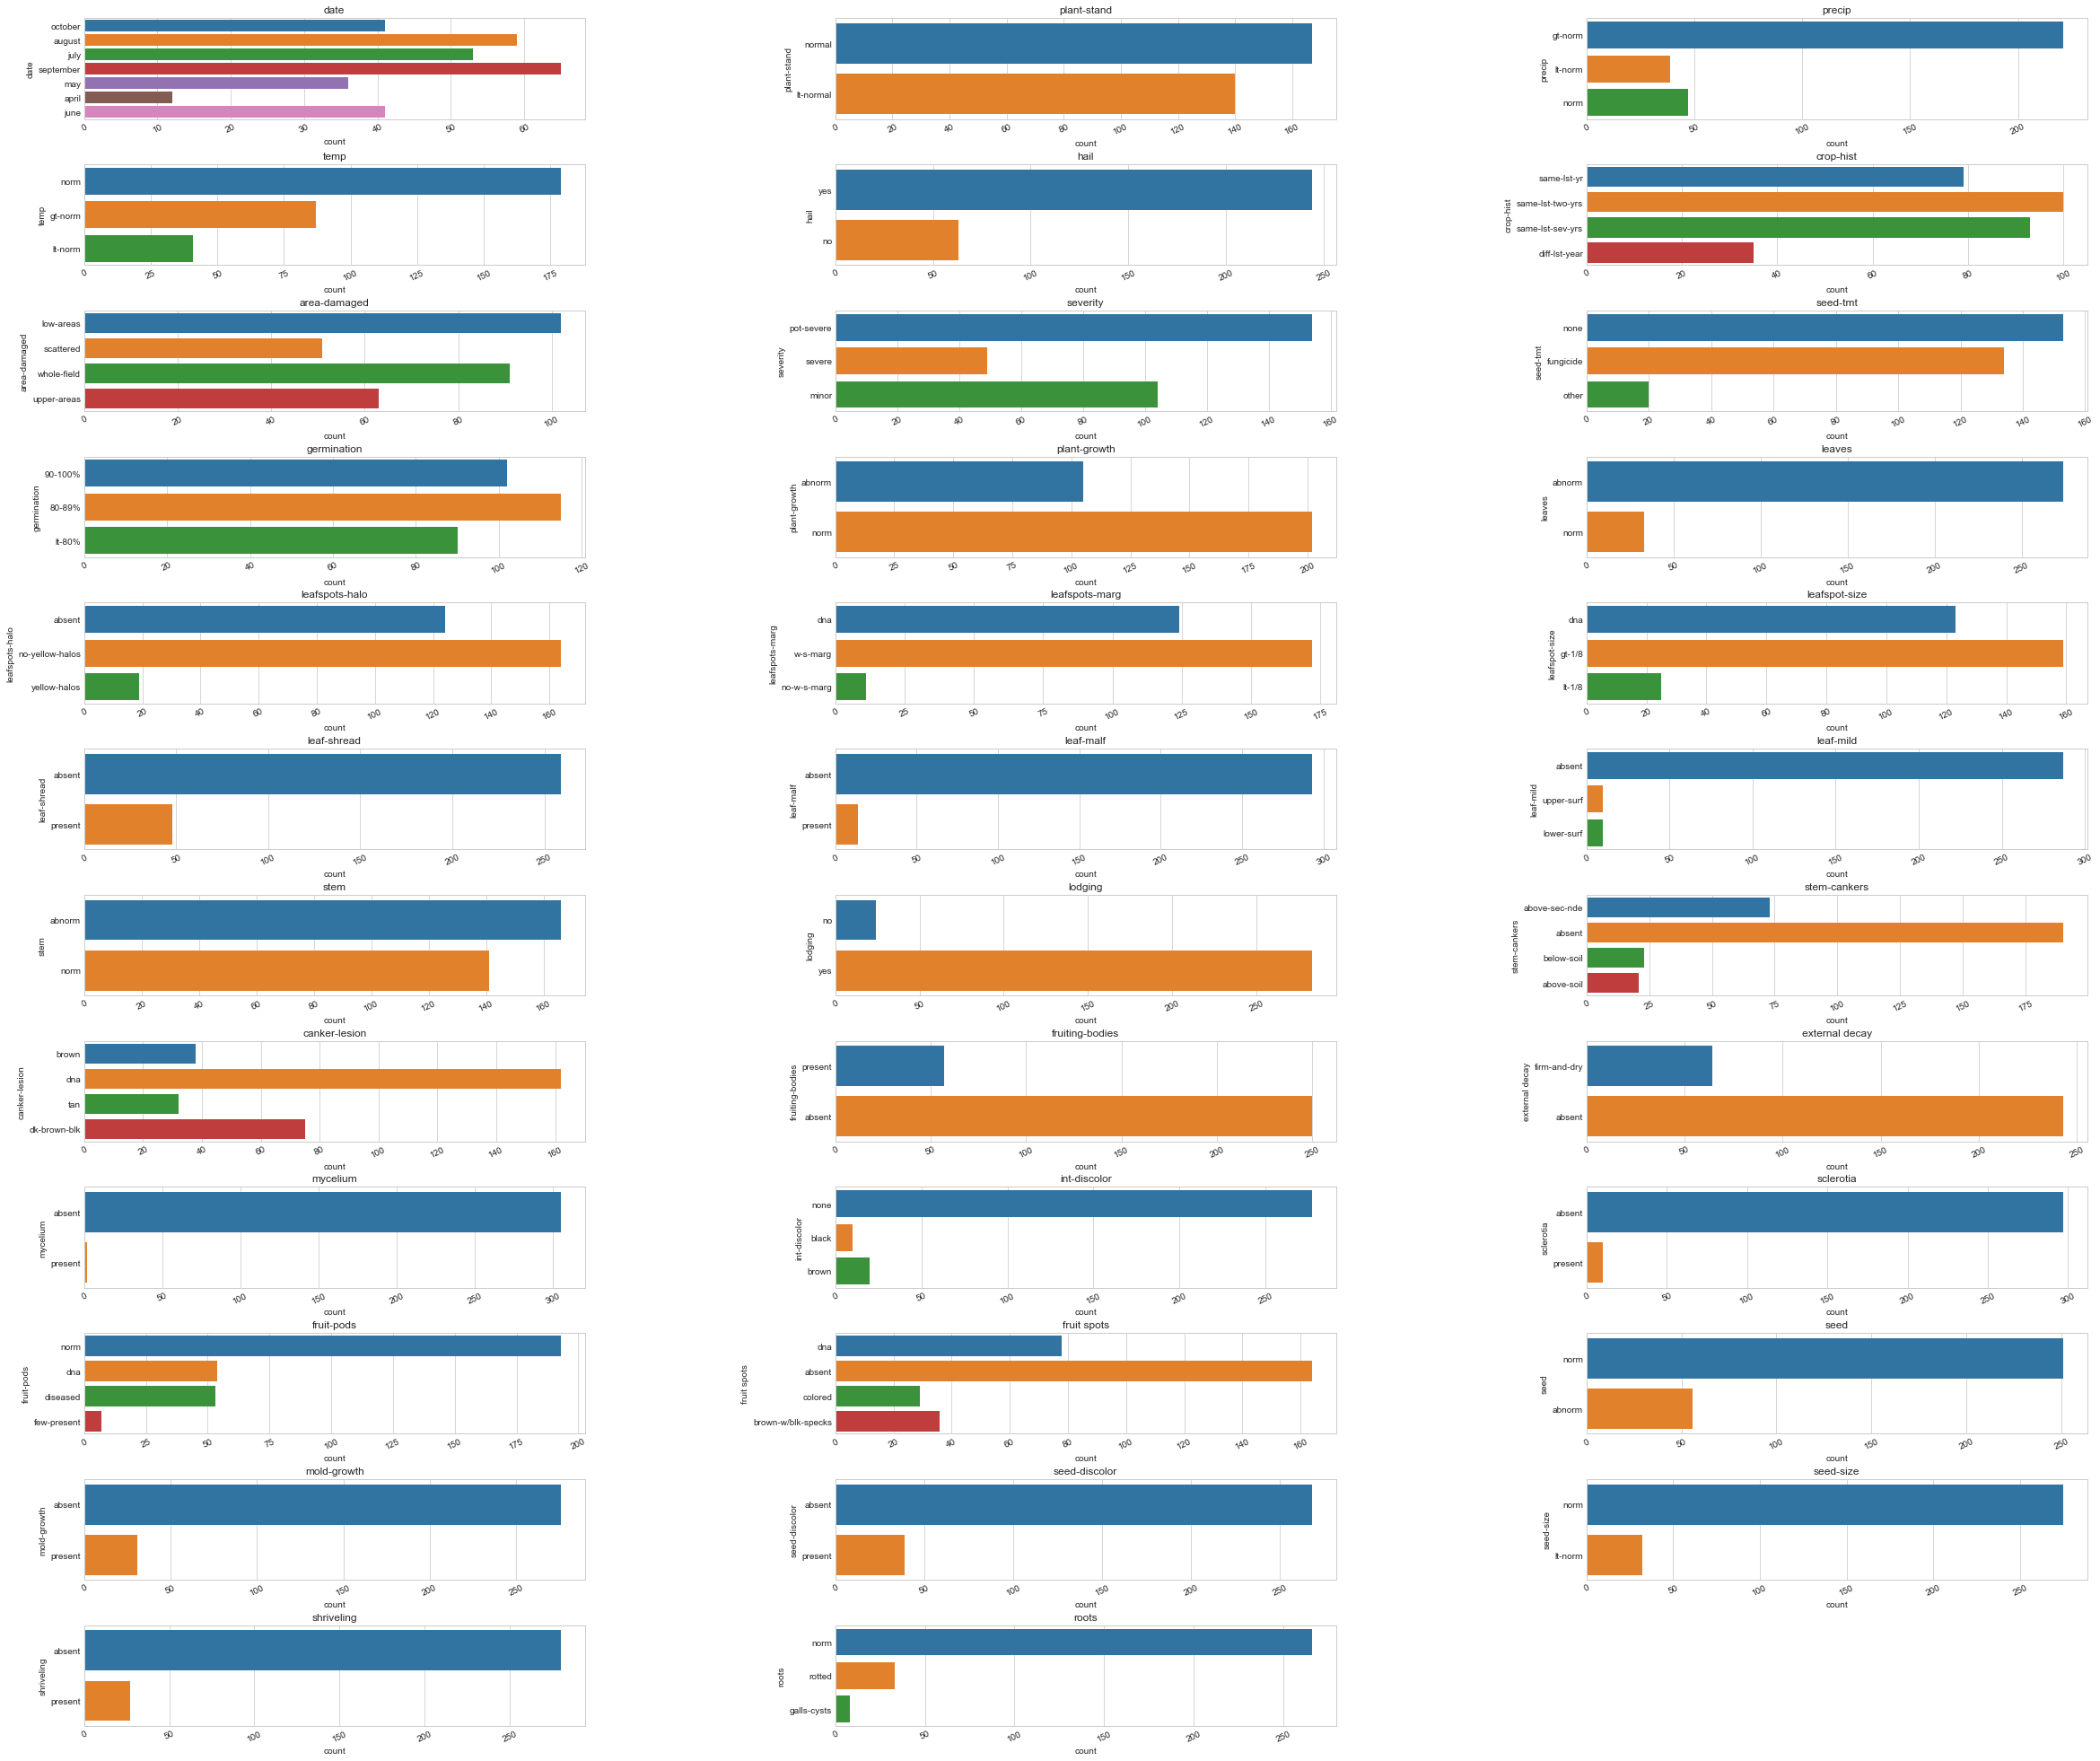

In [22]:
plot_distribution(dffill[cols_to_plot], cols=3, width=40, height=35, hspace=0.45, wspace=0.5)

Another rudimentary strategy we can use is to just remove all rows that have null values in them

In [46]:
dfstrat = dfd[dfd['class'].notna()]
dfstrat

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,frog-eye-leaf-spot,september,lt-normal,gt-norm,norm,yes,same-lst-yr,upper-areas,pot-severe,none,...,none,absent,norm,absent,norm,absent,absent,norm,absent,norm
286,frog-eye-leaf-spot,august,normal,gt-norm,gt-norm,yes,same-lst-yr,whole-field,pot-severe,fungicide,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm
287,frog-eye-leaf-spot,september,normal,gt-norm,norm,yes,same-lst-yr,upper-areas,minor,none,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm
288,frog-eye-leaf-spot,september,normal,gt-norm,gt-norm,yes,same-lst-two-yrs,scattered,minor,none,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm


This might be more accurate than interpolating values, but we may lose important information in the process 

Finally another strategy we can employ is we can find the mode of each feature and fill that into the nan values. It still might not be 100% accurate but it might not fill in the optimal data point.

In [55]:
from scipy.stats import mode
mode(dfd)

ModeResult(mode=array([['alternarialeaf-spot', 'september', 'normal', 'gt-norm', 'norm',
        'yes', 'same-lst-two-yrs', 'whole-field', 'pot-severe', 'none',
        '80-89%', 'norm', 'abnorm', 'no-yellow-halos', 'w-s-marg',
        'gt-1/8', 'absent', 'absent', 'absent', 'norm', 'yes', 'absent',
        'dna', 'absent', 'absent', 'absent', 'none', 'absent', 'norm',
        'absent', 'norm', 'absent', 'absent', 'norm', 'absent', 'norm']],
      dtype=object), count=array([[ 40,  61, 156, 187, 166, 211,  84,  84, 151, 140,  98, 196, 239,
        150, 160, 145, 218, 257, 246, 134, 248, 173, 145, 226, 202, 264,
        236, 256, 193, 164, 225, 241, 244, 251, 256, 260]]))

In [63]:
newfill =  lambda col: col.fillna(col.mode())
dffill2 = dfd.apply(newfill, axis=0)
dffill2

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,frog-eye-leaf-spot,september,lt-normal,gt-norm,norm,yes,same-lst-yr,upper-areas,pot-severe,none,...,none,absent,norm,absent,norm,absent,absent,norm,absent,norm
286,frog-eye-leaf-spot,august,normal,gt-norm,gt-norm,yes,same-lst-yr,whole-field,pot-severe,fungicide,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm
287,frog-eye-leaf-spot,september,normal,gt-norm,norm,yes,same-lst-yr,upper-areas,minor,none,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm
288,frog-eye-leaf-spot,september,normal,gt-norm,gt-norm,yes,same-lst-two-yrs,scattered,minor,none,...,none,absent,diseased,colored,norm,absent,absent,norm,absent,norm


In [64]:
dffill2.isna().sum()

class              0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

<AxesSubplot:>

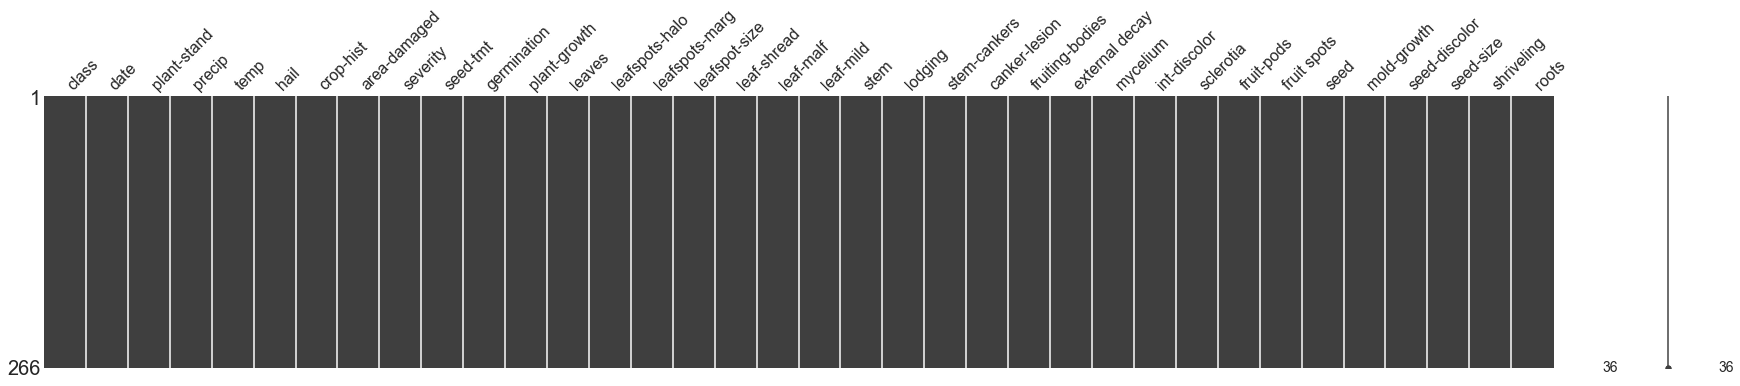

In [65]:
missingno.matrix(dffill2, figsize = (30,5))